In [1]:
#importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import time
import dtale
import tensorflow as tf

#Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#other Libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalaced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.165980e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.373150e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.086869e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.490107e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.177556e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406455e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [5]:
#all the features are numeric in nature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
#No null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
#The Target class is heavily skewed
print('Genuine Transactions',round(df['Class'].value_counts()[0]/len(df)*100,2), '% of the Dataset')
print('Fraud Transactions',round(df['Class'].value_counts()[1]/len(df)*100,2), '% of the Dataset')

Genuine Transactions 99.83 % of the Dataset
Fraud Transactions 0.17 % of the Dataset


Text(0.5, 1.0, 'Genuine vs Fraud Transactions')

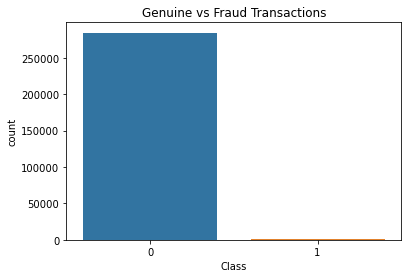

In [9]:
sns.countplot('Class',data=df)
plt.title('Genuine vs Fraud Transactions')

In [10]:
#Spliiting the Dataset into Train and test before analysing it further
X = df.drop('Class',axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 30), (56962, 30), (227845,), (56962,))

In [12]:
#Poportion of Genuine and fraud transactions in training and test set
print('Genuine Transactions in train set',round((len(y_train) - sum(y_train))/len(y_train)*100,2), '% of the Dataset')
print('Genuine Transactions in test set',round((len(y_test) - sum(y_test))/len(y_test)*100,2), '% of the Dataset')

print('Fraud Transactions in train set',round(sum(y_train)/len(y_train)*100,2), '% of the Dataset')
print('Fraud Transactions in test set',round(sum(y_test)/len(y_test)*100,2), '% of the Dataset')

Genuine Transactions in train set 99.83 % of the Dataset
Genuine Transactions in test set 99.83 % of the Dataset
Fraud Transactions in train set 0.17 % of the Dataset
Fraud Transactions in test set 0.17 % of the Dataset


In [13]:
#The dataset is split in to train and test set.
#We can further analzye the data and/or up/down sample the data to fit to our models.

In [14]:
#Using Dtale for exploratory data analyses
dtale.show(df)

<AxesSubplot:>

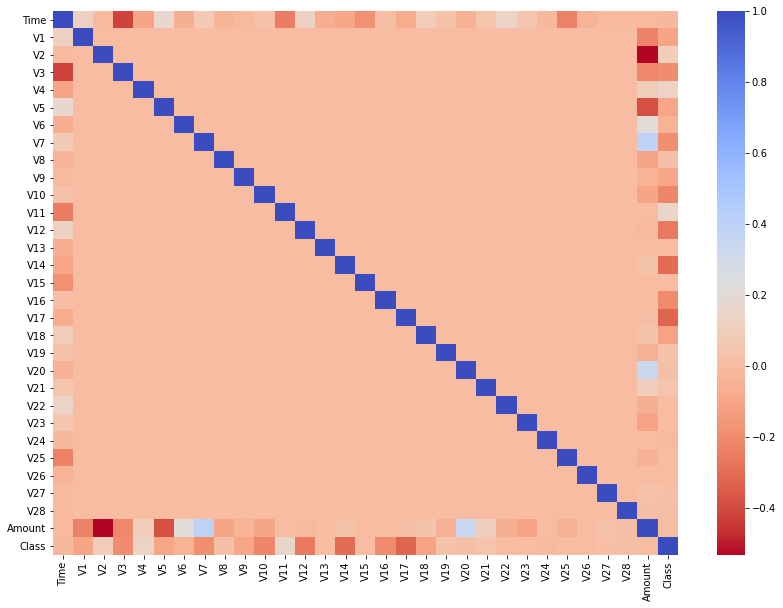

In [29]:
corr = df.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr,cmap='coolwarm_r')


In [17]:
#Before we upsample the data let us try some classifiers and see how they perform
classifiers = {
    "LogisticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier":SVC(),
}

In [18]:
for key, classifier in classifiers.items():
    classifier.fit(X_train,y_train)
    training_score = cross_val_score(classifier,X_train,y_train,cv=5)
    print('Classifiers: ', classifier.__class__.__name__, "has a training score of ", round(training_score.mean(),2)*100, "% accuracy score")

Classifiers:  LogisticRegression has a training score of  100.0 % accuracy score
Classifiers:  KNeighborsClassifier has a training score of  100.0 % accuracy score
Classifiers:  SVC has a training score of  100.0 % accuracy score


In [19]:
#it can be seen that all the classifiers are giving a score of 100 percent 
#let us select one of them and see if it correctly predicts the fraudelent transaction or not
y_train.sum()
#there are 394 fradulent transactions in training set 

394

In [20]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [21]:
pred = log_reg.predict(X_train)
print(classification_report(y_train,pred))
print(confusion_matrix(y_train,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.72      0.68      0.70       394

    accuracy                           1.00    227845
   macro avg       0.86      0.84      0.85    227845
weighted avg       1.00      1.00      1.00    227845

[[227348    103]
 [   128    266]]


In [22]:
#Thus it can be seen that the model is not that good and is missing most of the fradulent transactions even on the training set that it has already seen

In [23]:
X_train.shape, X_test.shape

((227845, 30), (56962, 30))

In [24]:
#checking for random forest 
rnd = RandomForestClassifier()
rnd.fit(X_train,y_train)
pred = rnd.predict(X_train)
print(classification_report(y_train,pred))
print(confusion_matrix(y_train,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845

[[227451      0]
 [     1    393]]


In [25]:
X_test.shape

(56962, 30)

In [27]:
pred1 = rnd.predict(X_test)
print(classification_report(y_test,pred1))
print(confusion_matrix(y_test,pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

[[56859     5]
 [   18    80]]


We can downsample or upsample the data to make it balanced and then check the models performance.
We would go for upsampling the data rather than downsampling since valuable information is lost in undersampling.

While oversampling and using cross validation care must be taken. The oversampling should not be applied before cross validation as the samples in the validation dataset will already be present in the train dataset and thus will lead to overfitting due to Data leakage.

In [30]:
print('Length of X (train): {} | Length of y (train): {}'.format(len(X_train), len(y_train)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(X_test), len(y_test)))

Length of X (train): 227845 | Length of y (train): 227845
Length of X (test): 56962 | Length of y (test): 56962


In [31]:
#We will append the scores to the list and then find the average
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

In [32]:
X_train.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)

In [34]:
log_reg = LogisticRegression()

log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.1, 1, 10]}
rand_log_reg = RandomizedSearchCV(log_reg,log_reg_params,n_iter=5)

#Implementing SMOTE for up sampling during cross validation.

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for train_index , test_index in sss.split(X_train,y_train):
    pipeline = imbalaced_make_pipeline(SMOTE(sampling_strategy='minority'),rand_log_reg)
            
    #we have the index for the training and the test dataset, now we will apply the SMOTE (upsampling) only on the test indexes
    model = pipeline.fit(X_train.iloc[train_index],y_train.iloc[train_index])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(X_train.iloc[test_index])
    
    precision_lst.append(precision_score(y_train.iloc[test_index],prediction))
    recall_lst.append(recall_score(y_train.iloc[test_index],prediction))
    f1_lst.append(f1_score(y_train.iloc[test_index],prediction))
    auc_lst.append(roc_auc_score(y_train.iloc[test_index],prediction))
        

Executing shutdown due to inactivity...


2020-11-21 17:19:10,053 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2020-11-21 17:19:14,479 - INFO     - Executing shutdown...


In [35]:
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))

precision: 0.06469464352708341
recall: 0.8888888888888888
f1: 0.12040325545019945


In [36]:
print(precision_lst)
print(recall_lst)
print(f1_lst)

[0.042921204356181936, 0.044382801664355064, 0.07553191489361702, 0.07027540360873694, 0.06820365033621517, 0.07925407925407925, 0.06824644549763033, 0.07088122605363985, 0.06255506607929516]
[0.8481012658227848, 0.810126582278481, 0.8987341772151899, 0.9367088607594937, 0.8987341772151899, 0.8607594936708861, 0.9113924050632911, 0.9367088607594937, 0.8987341772151899]
[0.08170731707317073, 0.084155161078238, 0.1393523061825319, 0.13074204946996468, 0.12678571428571428, 0.14514407684098185, 0.12698412698412698, 0.13178984861976847, 0.1169686985172982]


In [37]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(X_test)
print(classification_report(y_test, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.98      0.99     56864
       Fraud       0.06      0.91      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [38]:
print(confusion_matrix(y_test,smote_prediction))

[[55548  1316]
 [    9    89]]


In [39]:
#Thus it can be seen that a lot of normal transactions are being classified as fradulent transactions.

Text(0.5, 1.0, 'Precision Recall Curve')

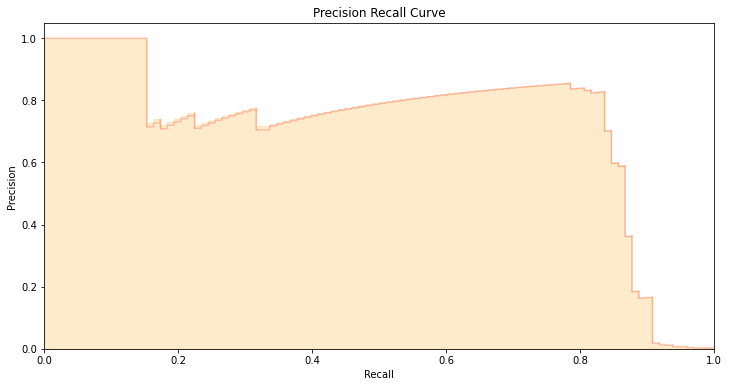

In [40]:
y_score = best_est.decision_function(X_test)

fig = plt.figure(figsize=(12,6))
precision, recall, _ = precision_recall_curve(y_test, y_score)
plt.step(recall, precision, color='r', alpha=0.2)
plt.fill_between(recall, precision, step='post', alpha=0.2,color='#F59B00')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision Recall Curve')

We will create a function for the upsampling using SMOTE and cross validation.

In [41]:
def smote_cross_val(X_train,y_train,X_test,y_test,algo):
    sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for train_index , test_index in sss.split(X_train,y_train):
        pipeline = imbalaced_make_pipeline(SMOTE(sampling_strategy='minority'),algo)

        #we have the index for the training and the test dataset, now we will apply the SMOTE (upsampling) only on the test indexes
        model = pipeline.fit(X_train.iloc[train_index],y_train.iloc[train_index])
        best_est = algo.best_estimator_
        print(algo.best_estimator_)
        prediction = best_est.predict(X_train.iloc[test_index])

        precision_lst.append(precision_score(y_train.iloc[test_index],prediction))
        recall_lst.append(recall_score(y_train.iloc[test_index],prediction))
        f1_lst.append(f1_score(y_train.iloc[test_index],prediction))
        auc_lst.append(roc_auc_score(y_train.iloc[test_index],prediction))
        
    print("precision: {}".format(np.mean(precision_lst)))
    print("recall: {}".format(np.mean(recall_lst)))
    print("f1: {}".format(np.mean(f1_lst)))
    
    labels = ['No Fraud', 'Fraud']
    smote_prediction = best_est.predict(X_test)
    print('Classification report for the best estimator')
    print(classification_report(y_test, smote_prediction, target_names=labels))
    print('Confusion matirx for the best estimator')
    print(confusion_matrix(y_test,smote_prediction))

In [ ]:
svc = SVC()

svc_params = {'C': [0.1, 1, 10]}
rand_svc = RandomizedSearchCV(svc,svc_params,n_iter=5)

In [ ]:
smote_cross_val(X_train,y_train,X_test,y_test,rand_svc)

In [68]:
#the above two cells are not evaluated as they take too long to finish

In [42]:
sm = SMOTE(sampling_strategy='minority',random_state=42)
X_trainsm, y_trainsm = sm.fit_sample(X_train,y_train)
X_trainsm.shape, X_train.shape

((454902, 30), (227845, 30))

In [53]:
forest = RandomForestClassifier(bootstrap=True,oob_score=True,warm_start=True,verbose=1,max_depth=15,n_jobs=-1)
forest.fit(X_trainsm,y_trainsm)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.5min finished


RandomForestClassifier(max_depth=15, n_jobs=-1, oob_score=True, verbose=1,
                       warm_start=True)

In [54]:
feat_imp = pd.DataFrame(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],columns=['Feature Name'])

In [55]:
feat_imp['Feature Importances'] = forest.feature_importances_

In [56]:
feat_imp.sort_values('Feature Importances',ascending=False).head(5)

,Feature Name,Feature Importances
14,V14,0.261268
10,V10,0.103201
12,V12,0.091756
4,V4,0.091629
11,V11,0.076397


In [57]:
forest_pred = forest.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


In [58]:
print(classification_report(y_test,forest_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.87      0.77        98

    accuracy                           1.00     56962
   macro avg       0.85      0.93      0.89     56962
weighted avg       1.00      1.00      1.00     56962



In [59]:
print(confusion_matrix(y_test,forest_pred))

[[56827    37]
 [   13    85]]


In [60]:
#Random forest using GridSearchCV

In [61]:
forest_grid = RandomForestClassifier(n_estimators=100,oob_score=True,warm_start=True,verbose=1,random_state=42,n_jobs=-1)
forest_params = {"max_depth": [15,18,20], 'min_samples_leaf': [3,5,7]}
forest_random = GridSearchCV(forest_grid,forest_params)

forest_random.fit(X_trainsm,y_trainsm)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]:

[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jo

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.2min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.2min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=42, verbose=1,
                                              warm_start=True),
             param_grid={'max_depth': [15, 18, 20],
                         'min_samples_leaf': [3, 5, 7]})

In [62]:
forest_random.best_estimator_

RandomForestClassifier(max_depth=20, min_samples_leaf=3, n_jobs=-1,
                       oob_score=True, random_state=42, verbose=1,
                       warm_start=True)

In [63]:
forest_random.best_score_

0.9998461206062681

In [64]:
forest_random.cv_results_

{'mean_fit_time': array([ 76.16487117,  78.57608185,  79.11582775,  85.43729262,
         84.81033864,  83.43027325, 190.09305153, 191.80567737,
        206.16860833]),
 'std_fit_time': array([0.97861595, 2.09488578, 1.42988697, 1.73500328, 0.73221569,
        1.97315156, 6.33857934, 2.60373966, 8.27756156]),
 'mean_score_time': array([0.27592068, 0.3074039 , 0.30486221, 0.32171459, 0.31794009,
        0.29619813, 0.88463631, 0.9690105 , 1.047405  ]),
 'std_score_time': array([0.01444644, 0.02877635, 0.03954398, 0.03858671, 0.02472401,
        0.01367707, 0.06864407, 0.05582332, 0.2341039 ]),
 'param_max_depth': masked_array(data=[15, 15, 15, 18, 18, 18, 20, 20, 20],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[3, 5, 7, 3, 5, 7, 3, 5, 7],
              mask=[False, False, False, False, False, False, False, False,
                  

In [65]:
forest_pred_grid = forest_random.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.5s finished


In [66]:
print(classification_report(y_test,forest_pred_grid))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.87      0.82        98

    accuracy                           1.00     56962
   macro avg       0.89      0.93      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [67]:
print(confusion_matrix(y_test,forest_pred_grid))

[[56839    25]
 [   13    85]]
